In [1]:
import tensorflow as tf

In [2]:
def load_data(data, mode):
    save_path = "D:\\The Great Big World of Machine Learning\Projects\datasets\AdienceBenchmarkGenderAndAgeClassification\\ImgGenDataset"
    dataset = tf.data.experimental.load(save_path+"\\"+data+"\\"+mode) # save dataset to file
    print(f"{data} {mode} loaded")
    return dataset

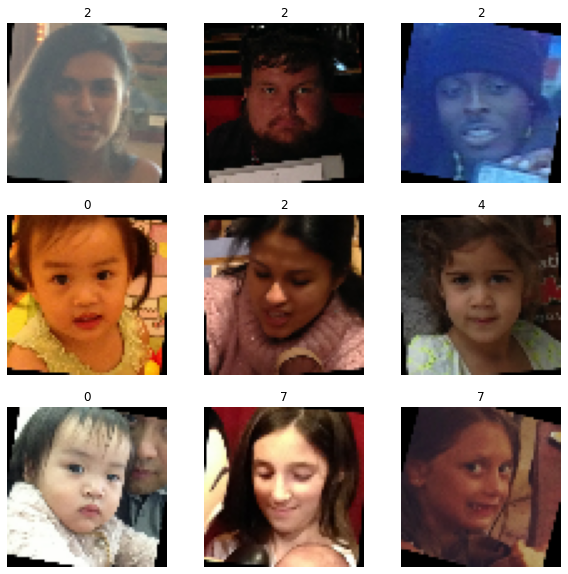

In [28]:
# Visualizing the first 9 images in the data
def visualise_images(dataset):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
      for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i])) # labels have been sparse encoded
        plt.axis("off")

In [ ]:
from Training_Module import AgeGenderModel
def train_eval(dataset_dict, data_mode):
    # define model layers
    output_size = 8 if data_mode=='age' else 2 # num of classes
    train_data = datasets[data_mode][0] # training data
    test_data = datasets[data_mode][1] # test data
    val_data = datasets[data_mode][2] # validation data

    # get_batch_size ==> next(iter(training_dataset))[label].shape[training_batch_size]
    batch_size = next(iter(train_data))[1].shape[0]

    model = AgeGenderModel(output_size=output_size, batch_size=batch_size, data=data_mode)
    print("Training model")
    model.train_model(train_data=train_data, val_data=val_data)
    print("Evaluating model:")
    model.evaluate_model(test_data=test_data)
    return model


In [3]:
datasets = {'age': [],
            'gender': []
            }
modes = ['train', 'test', 'val']

for datum in datasets.keys():
    for mode in modes:
        data = load_data(data=datum, mode=mode)
        datasets[datum].append(data)


age train loaded
age test loaded
age val loaded
gender train loaded
gender test loaded
gender val loaded


In [7]:
'''
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

# begin training
#age_model.train_model(age_train, age_val, 50)

# visualize and debug with Tensorboard
%tensorboard --logdir logs/fit
'''

'\n# Load the TensorBoard notebook extension\n%load_ext tensorboard\n\n# Clear any logs from previous runs\n!rm -rf ./logs/\n\n# begin training\n#age_model.train_model(age_train, age_val, 50)\n\n# visualize and debug with Tensorboard\n%tensorboard --logdir logs/fit\n'